In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
case_file = pd.read_csv("case_time_series.csv")

In [4]:
case_file.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily Vaccinated,Total Vaccinated
0,30-01-2020,1,1,0,0,0,0,NaN,0.0
1,31-01-2020,0,1,0,0,0,0,NaN,0.0
2,01-02-2020,0,1,0,0,0,0,NaN,0.0
3,02-02-2020,1,2,0,0,0,0,NaN,0.0
4,03-02-2020,1,3,0,0,0,0,NaN,0.0


In [5]:
case_file.isnull().sum()

Date                  0
Daily Confirmed       0
Total Confirmed       0
Daily Recovered       0
Total Recovered       0
Daily Deceased        0
Total Deceased        0
Daily Vaccinated    457
Total Vaccinated      1
dtype: int64

In [6]:
case_file = case_file.replace(np.nan,0, regex = True)
case_file.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily Vaccinated,Total Vaccinated
0,30-01-2020,1,1,0,0,0,0,0.0,0.0
1,31-01-2020,0,1,0,0,0,0,0.0,0.0
2,01-02-2020,0,1,0,0,0,0,0.0,0.0
3,02-02-2020,1,2,0,0,0,0,0.0,0.0
4,03-02-2020,1,3,0,0,0,0,0.0,0.0


In [7]:
loc=0
length = case_file.shape[0]
while(loc < length-1):
    value = (case_file['Total Vaccinated'][loc+1] - case_file['Total Vaccinated'][loc])
    if value < 0:
        case_file['Daily Vaccinated'][loc+1] = 0
    else:
        case_file['Daily Vaccinated'][loc+1] = int(value)
    loc+=1

In [8]:
case_file = case_file.replace(np.nan,0, regex = True)
case_file.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily Vaccinated,Total Vaccinated
0,30-01-2020,1,1,0,0,0,0,0.0,0.0
1,31-01-2020,0,1,0,0,0,0,0.0,0.0
2,01-02-2020,0,1,0,0,0,0,0.0,0.0
3,02-02-2020,1,2,0,0,0,0,0.0,0.0
4,03-02-2020,1,3,0,0,0,0,0.0,0.0


In [9]:
case_file.head(200)

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily Vaccinated,Total Vaccinated
0,30-01-2020,1,1,0,0,0,0,0.0,0.0
1,31-01-2020,0,1,0,0,0,0,0.0,0.0
2,01-02-2020,0,1,0,0,0,0,0.0,0.0
3,02-02-2020,1,2,0,0,0,0,0.0,0.0
4,03-02-2020,1,3,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
195,12-08-2020,67066,2395485,57759,1695853,950,47149,0.0,0.0
196,13-08-2020,64141,2459626,54776,1750629,1006,48155,0.0,0.0
197,14-08-2020,65610,2525236,56920,1807549,989,49144,0.0,0.0
198,15-08-2020,63986,2589222,53116,1860665,952,50096,0.0,0.0


In [10]:
train_dates = pd.to_datetime(case_file["Date"])

In [11]:
case_file.drop(['Total Confirmed', 'Total Recovered', 'Total Deceased', 'Total Vaccinated'], 
                               axis='columns', inplace=True)

In [12]:
case_file.head(500)

,Date,Daily Confirmed,Daily Recovered,Daily Deceased,Daily Vaccinated
0,30-01-2020,1,0,0,0.0
1,31-01-2020,0,0,0,0.0
2,01-02-2020,0,0,0,0.0
3,02-02-2020,1,0,0,0.0
4,03-02-2020,1,0,0,0.0
...,...,...,...,...,...
452,26-04-2021,319471,249009,2762,3359963.0
453,27-04-2021,362913,262349,3286,2556181.0
454,28-04-2021,379404,274171,3646,2193281.0
455,29-04-2021,386773,291727,3502,2224531.0


## Multivariant Recovered (Taken 'Daily Confirmed', 'Daily Recovered')

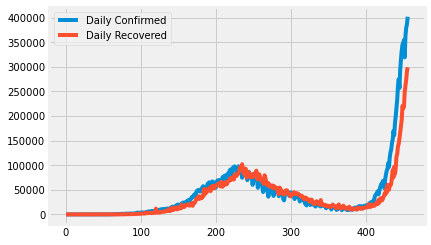

In [13]:
cols = list(case_file)[1:3]

df_for_training = case_file[cols].astype(float)

df_for_plot = df_for_training.tail(500)
df_for_plot.plot.line()

In [14]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

trainX = []
trainY = []
n_feature = 1
n_past = 30

for i in range(n_past, len(df_for_training_scaled) - n_feature +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_feature - 1:i + n_feature, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (427, 30, 2).
trainY shape == (427, 1).


In [15]:
trainY 

array([[-6.69246585e-01],
       [-6.69246585e-01],
       [-6.69214655e-01],
       [-6.69230620e-01],
       [-6.68895350e-01],
       [-6.69214655e-01],
       [-6.69230620e-01],
       [-6.69198689e-01],
       [-6.69166759e-01],
       [-6.69102898e-01],
       [-6.69007107e-01],
       [-6.69118863e-01],
       [-6.69086933e-01],
       [-6.69086933e-01],
       [-6.69070967e-01],
       [-6.69086933e-01],
       [-6.69023072e-01],
       [-6.68927280e-01],
       [-6.68847454e-01],
       [-6.68815524e-01],
       [-6.68320601e-01],
       [-6.68001297e-01],
       [-6.68144984e-01],
       [-6.67745853e-01],
       [-6.68065158e-01],
       [-6.67873575e-01],
       [-6.68081123e-01],
       [-6.66803904e-01],
       [-6.67075313e-01],
       [-6.67330757e-01],
       [-6.66261086e-01],
       [-6.64313327e-01],
       [-6.62477325e-01],
       [-6.61487480e-01],
       [-6.60306053e-01],
       [-6.60002713e-01],
       [-6.59523756e-01],
       [-6.61519411e-01],
       [-6.6

In [16]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

trainY=np.asarray(trainY).astype(np.float32)
history = model.fit(trainX, trainY, epochs=300, batch_size=16, validation_split=0.1, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            17152     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 29,601
Trainable params: 29,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
24/24 [==============================] - 12s 461ms/step - loss: 0.1786 - val_loss: 6.3256
Epoch 2/300
24/24 [==============================] - 0s 10ms/step - loss: 0.0630 - val_loss: 2.1811
Epoch 3/300
24/24 [=============================

24/24 [==============================] - 0s 10ms/step - loss: 0.0256 - val_loss: 2.8061
Epoch 154/300
24/24 [==============================] - 0s 10ms/step - loss: 0.0252 - val_loss: 2.2440
Epoch 155/300
24/24 [==============================] - 0s 10ms/step - loss: 0.0307 - val_loss: 2.0257
Epoch 156/300
24/24 [==============================] - 0s 10ms/step - loss: 0.0212 - val_loss: 2.4831
Epoch 157/300
24/24 [==============================] - 0s 10ms/step - loss: 0.0169 - val_loss: 2.4888
Epoch 158/300
24/24 [==============================] - 0s 10ms/step - loss: 0.0197 - val_loss: 1.6620
Epoch 159/300
24/24 [==============================] - 0s 10ms/step - loss: 0.0221 - val_loss: 1.7746
Epoch 160/300
24/24 [==============================] - 0s 10ms/step - loss: 0.0206 - val_loss: 2.2000
Epoch 161/300
24/24 [==============================] - 0s 10ms/step - loss: 0.0198 - val_loss: 1.8770
Epoch 162/300
24/24 [==============================] - 0s 10ms/step - loss: 0.0237 - val_loss: 2

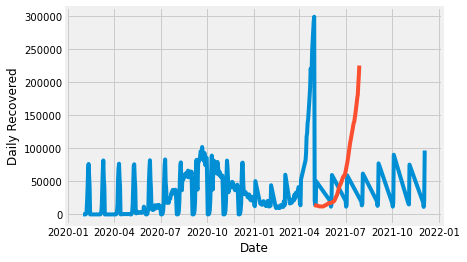

In [17]:
n_future=90  #Redefining n_future to extend prediction dates beyond original n_future dates...
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()

forecast = model.predict(trainX[-n_future:]) #forecast 

forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]

forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Daily Recovered':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

original = case_file[['Date', 'Daily Recovered']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '30-01-2020']

sns.lineplot(original['Date'], original['Daily Recovered'])
sns.lineplot(df_forecast['Date'], df_forecast['Daily Recovered'])